In [8]:
# Правильный импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries have been imported!")


df = pd.read_csv('A:/python projects/FastFoodNutritionMenuV3.csv')
print("The data has been uploaded successfully!")
print(f"Data size: {df.shape}")


df.head()

Libraries have been imported!
The data has been uploaded successfully!
Data size: (1147, 14)


,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [9]:
print("Real column names:")
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")

Real column names:
0: 'Company'
1: 'Item'
2: 'Calories'
3: 'Calories from
Fat'
4: 'Total Fat
(g)'
5: 'Saturated Fat
(g)'
6: 'Trans Fat
(g)'
7: 'Cholesterol
(mg)'
8: 'Sodium 
(mg)'
9: 'Carbs
(g)'
10: 'Fiber
(g)'
11: 'Sugars
(g)'
12: 'Protein
(g)'
13: 'Weight Watchers
Pnts'


In [10]:
# Fixing column names
df_clean = df.copy()

# Remove newline characters and extra spaces
df_clean.columns = [col.replace('\n', ' ').replace('  ', ' ').strip() for col in df_clean.columns]

print("Corrected column names:")
for i, col in enumerate(df_clean.columns):
    print(f"{i}: '{col}'")

# Using actual column names we see above
numeric_cols = ['Calories', 'Calories from Fat', 'Total Fat (g)', 'Saturated Fat (g)',
                'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)', 'Carbs (g)',
                'Fiber (g)', 'Sugars (g)', 'Protein (g)', 'Weight Watchers Pnts']

print("\nConverting numeric columns:")
for col in numeric_cols:
    if col in df_clean.columns:
        print(f"Processing: {col}")
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    else:
        print(f"Skipping (not found): {col}")

print("Data is ready for visualization!")

Corrected column names:
0: 'Company'
1: 'Item'
2: 'Calories'
3: 'Calories from Fat'
4: 'Total Fat (g)'
5: 'Saturated Fat (g)'
6: 'Trans Fat (g)'
7: 'Cholesterol (mg)'
8: 'Sodium (mg)'
9: 'Carbs (g)'
10: 'Fiber (g)'
11: 'Sugars (g)'
12: 'Protein (g)'
13: 'Weight Watchers Pnts'

Converting numeric columns:
Processing: Calories
Processing: Calories from Fat
Processing: Total Fat (g)
Processing: Saturated Fat (g)
Processing: Trans Fat (g)
Processing: Cholesterol (mg)
Processing: Sodium (mg)
Processing: Carbs (g)
Processing: Fiber (g)
Processing: Sugars (g)
Processing: Protein (g)
Processing: Weight Watchers Pnts
Data is ready for visualization!


VISUALIZATIONS


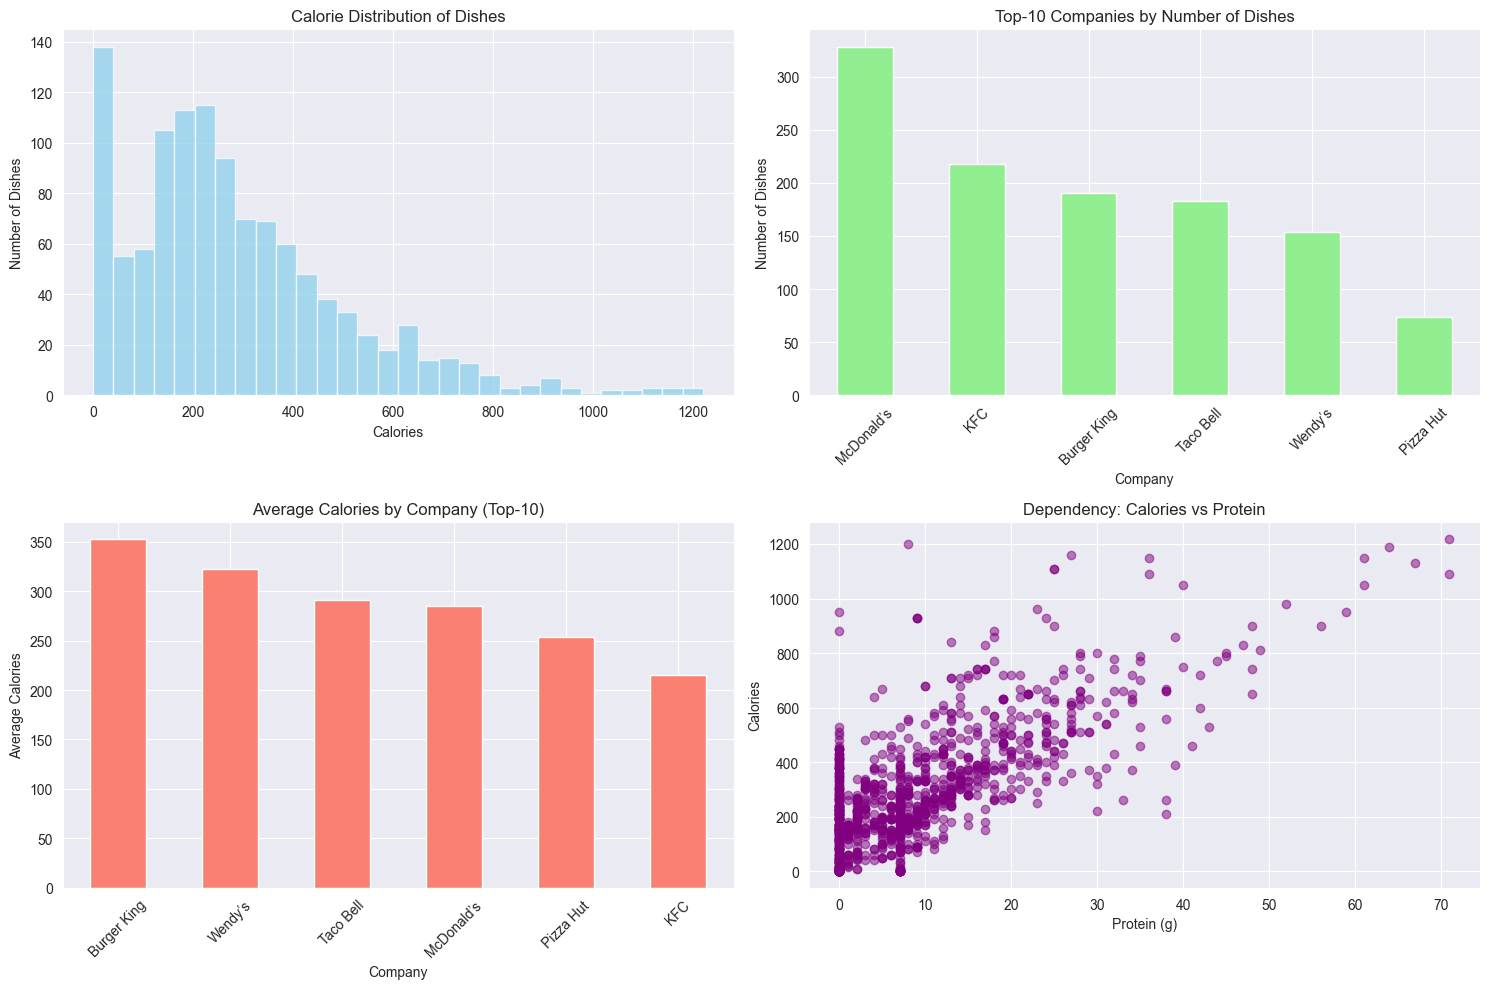

Charts created!


In [11]:
# VISUALIZATIONS
print("VISUALIZATIONS")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Calories distribution
df_clean['Calories'].hist(bins=30, ax=ax1, alpha=0.7, color='skyblue')
ax1.set_title('Calorie Distribution of Dishes')
ax1.set_xlabel('Calories')
ax1.set_ylabel('Number of Dishes')

# 2. Top-10 companies by number of dishes
df_clean['Company'].value_counts().head(10).plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Top-10 Companies by Number of Dishes')
ax2.set_ylabel('Number of Dishes')
ax2.tick_params(axis='x', rotation=45)

# 3. Average calories by company (Top-10)
df_clean.groupby('Company')['Calories'].mean().sort_values(ascending=False).head(10).plot(
    kind='bar', ax=ax3, color='salmon')
ax3.set_title('Average Calories by Company (Top-10)')
ax3.set_ylabel('Average Calories')
ax3.tick_params(axis='x', rotation=45)

# 4. Calories vs Protein dependency
ax4.scatter(df_clean['Protein (g)'], df_clean['Calories'], alpha=0.5, color='purple')
ax4.set_title('Dependency: Calories vs Protein')
ax4.set_xlabel('Protein (g)')
ax4.set_ylabel('Calories')

plt.tight_layout()
plt.show()

print("Charts created!")

In [12]:
print('ENHANCED FAST FOOD ANALYSIS')

# 1. top 5 most caloric dishes
top_caloric = df_clean.nlargest(5, 'Calories')[['Company', 'Item', 'Calories']]
print("Top 5 most caloric dishes: ")
print(top_caloric)

ENHANCED FAST FOOD ANALYSIS
Top 5 most caloric dishes: 
         Company                                              Item  Calories
334  Burger King              Triple Whopper® Sandwich with Cheese    1220.0
730          KFC                             Potato Salad (Family)    1200.0
337  Burger King                       Cheddar Bacon King Sandwich    1190.0
127   McDonald’s      Chocolate Triple Thick® Shake (32 fl oz cup)    1160.0
88    McDonald’s  Big Breakfast with Hotcakes (Large Size Biscuit)    1150.0


In [13]:
#2 Restaurant comparison by multiple metrics
restaurant_stats = df_clean.groupby('Company').agg({
    'Calories': ['mean', 'max', 'min'],
    'Protein (g)': 'mean',
    'Total Fat (g)': 'mean'
}).round(1)

print('\nRestaurants comparison:')
print(restaurant_stats)


Restaurants comparison:
            Calories                Protein (g) Total Fat (g)
                mean     max    min        mean          mean
Company                                                      
Burger King    352.3  1220.0    0.0        10.6          16.1
KFC            215.2  1200.0    0.0         5.6           7.5
McDonald’s     284.6  1160.0    0.0         9.4          10.0
Pizza Hut      253.4   470.0  120.0        11.2          10.9
Taco Bell      291.3   930.0    0.0         9.8          13.7
Wendy’s        322.5  1090.0    0.0        11.0          12.1


In [14]:
# 3. Nutrient ratios
df_clean['Protein_Ratio'] = (df_clean['Protein (g)'] / df_clean['Calories'] * 100).round(2)
healthy_options = df_clean[df_clean['Protein_Ratio'] > 20][["Company", "Item", 'Calories', 'Protein (g)', 'Protein_Ratio']]
print("\nHigh-protein options (Protein > 20% of calories):")
print(healthy_options.head(10))


High-protein options (Protein > 20% of calories):
        Company                                             Item  Calories  \
1019  Taco Bell  Brisk® Unsweetened No Lemon Iced Tea (16 fl oz)       0.0   
1020  Taco Bell                       Diet Dr Pepper® (16 fl oz)       0.0   
1021  Taco Bell                         Diet Mtn Dew® (16 fl oz)       5.0   
1022  Taco Bell                           Diet Pepsi® (16 fl oz)       0.0   
1024  Taco Bell                      G2 – Fruit Punch (16 fl oz)      30.0   
1027  Taco Bell        Mtn Dew® Baja Blast Zero Sugar (16 fl oz)       5.0   
1032  Taco Bell                     Pepsi® Zero Sugar (16 fl oz)       0.0   
1037  Taco Bell  Brisk® Unsweetened No Lemon Iced Tea (20 fl oz)       0.0   
1038  Taco Bell                       Diet Dr Pepper® (20 fl oz)       0.0   
1039  Taco Bell                         Diet Mtn Dew® (20 fl oz)      10.0   

      Protein (g)  Protein_Ratio  
1019          7.0            inf  
1020          7.0   